In [1]:
!git clone https://github.com/Pleias/pleias_ScholasticAI
!cd pleias_ScholasticAI

Cloning into 'pleias_ScholasticAI'...
remote: Enumerating objects: 1145, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 1145 (delta 79), reused 95 (delta 56), pack-reused 1010 (from 1)
Receiving objects: 100% (1145/1145), 92.15 MiB | 7.59 MiB/s, done.
Resolving deltas: 100% (585/585), done.


Apply change from here: https://github.com/Pleias/pleias_ScholasticAI/pull/12
In short: remove `sqlite==3.45.3` line from deps (`pleias_ScholasticAI/requirements.txt`).

In [ ]:
!cd pleias_ScholasticAI; wget https://github.com/Mozilla-Ocho/llamafile/releases/download/0.8.13/llamafile-0.8.13; chmod +x llamafile-0.8.13
!cd pleias_ScholasticAI; wget 'https://huggingface.co/PleIAs/Pleias-Pico-GGUF/resolve/main/pleias_pico_bf16.gguf'
# Run in background manually
# For WSL2: https://github.com/mozilla-ai/llamafile/issues/579
#!cd pleias_ScholasticAI; ./llamafile-0.8.13 -m pleias_pico_bf16.gguf -c 2048 --server --nobrowser &

In [7]:
!cd pleias_ScholasticAI; pip install -r requirements.txt

  Using cached FlagEmbedding-1.3.2.tar.gz (177 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.1.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pdfplumber-0.11.4-py3-none-any.whl.metadata (41 kB)
  Using cached pillow-11.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pymupdf-1.25.0-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.4 kB)
  Using cached PyQt5-5.15.11-cp38-abi3-manylinux_2_17_x86_64.whl.metadata (2.1 kB)
  Using cached PyQt5_sip-12.15.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (421 bytes)
  Using cached PySide6-6.8.0-cp39-abi3-manylinux_2_28_x86_64.whl.metadata (5.3 kB)
  Using cach

In [9]:
!cd pleias_ScholasticAI; python -m src.main

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/alexey/test/mipt_mag_diploma/conference/rag_analyze/pleias_ScholasticAI/src/main.py", line 10, in <module>
    from src.core.connect_db import ConnectDB
  File "/home/alexey/test/mipt_mag_diploma/conference/rag_analyze/pleias_ScholasticAI/src/core/connect_db.py", line 8, in <module>
    from src.core.pdf_processing_pipeline import process_pdfs_in_folder
  File "/home/alexey/test/mipt_mag_diploma/conference/rag_analyze/pleias_ScholasticAI/src/core/pdf_processing_pipeline.py", line 22, in <module>
    from ultralytics import YOLO
  File "/home/alexey/test/.venv/lib/python3.12/site-packages/ultralytics/__init__.py", line 10, in <module>
    from ultralytics.data.explorer.explorer import Explorer
  File "/home/alexey/test/.venv/lib/python3.12/site-packages/ultralytics/data/__init__.py", line 3, in <module>
    from .base import BaseDatase

In [1]:
!pip install doclayout-yolo rapid_latex_ocr requests ultralytics

  Using cached doclayout_yolo-0.0.4-py3-none-any.whl.metadata (13 kB)
  Using cached rapid_latex_ocr-0.0.9-py3-none-any.whl.metadata (990 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached pillow-12.0.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyyaml-6.0.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.4 kB)
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached torch-2.9.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.24.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (5.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 

In [3]:
import cv2
from ultralytics import YOLO

# Load the pre-trained model
model = YOLO("pleias_ScholasticAI/models/yolo.pt")
pred = model.predict(
    #"test_images/t1_page_1.png",   # Image to predict
    "../../../test_images/t3_page_2.png",   # Image to predict
    imgsz=1024,        # Prediction image size
    conf=0.2,          # Confidence threshold
    device="cuda:0"    # Device to use (e.g., 'cuda:0' or 'cpu')
)
pred[0].save_crop(save_dir="test_output1", file_name="detection")


image 1/1 /home/alexey/test/mipt_mag_diploma/conference/rag_analyze/../../../test_images/t3_page_2.png: 1024x736 1 GraphicZone-Maths, 1 MainZone-Head, 3 MainZone-Ps, 1 MainZone-P-Continued, 1 NumberingZone, 43.5ms
Speed: 7.0ms preprocess, 43.5ms inference, 7.3ms postprocess per image at shape (1, 3, 1024, 736)


Processing image: test_output1/MainZone-P-Continued/detection.jpg


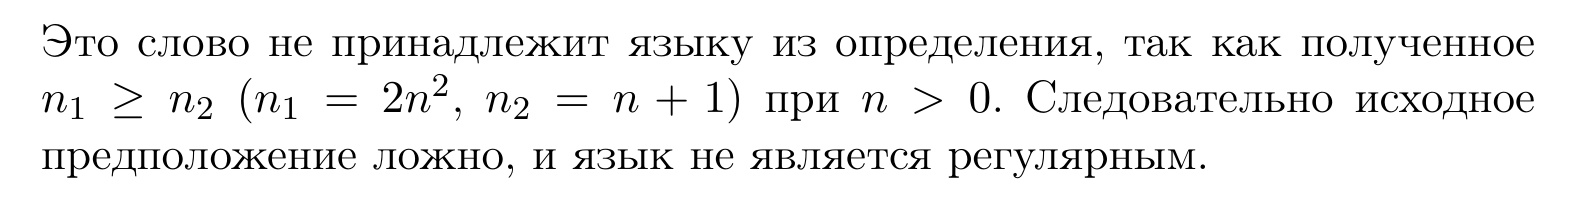

Processing image: test_output1/MainZone-P/detection.jpg


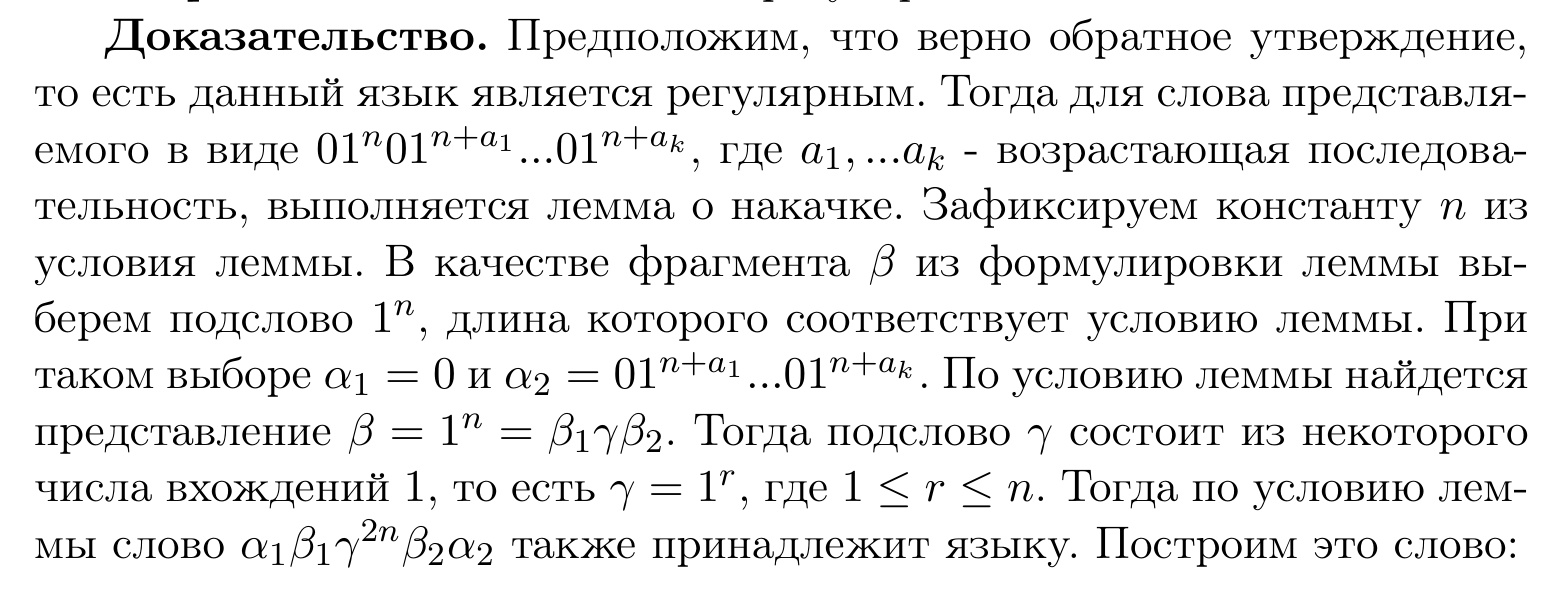

Processing image: test_output1/MainZone-P/detection3.jpg


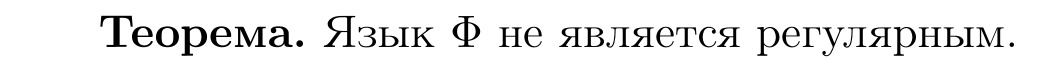

Processing image: test_output1/MainZone-P/detection2.jpg


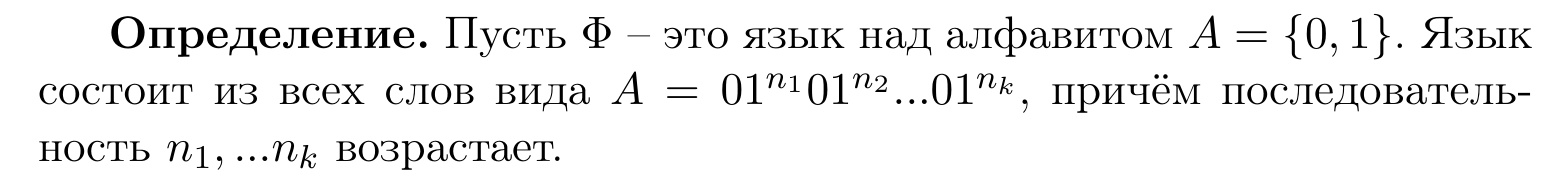

Processing image: test_output1/NumberingZone/detection.jpg


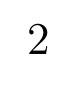

Processing image: test_output1/MainZone-Head/detection.jpg


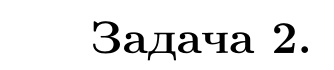

Processing image: test_output1/GraphicZone-Maths/detection.jpg


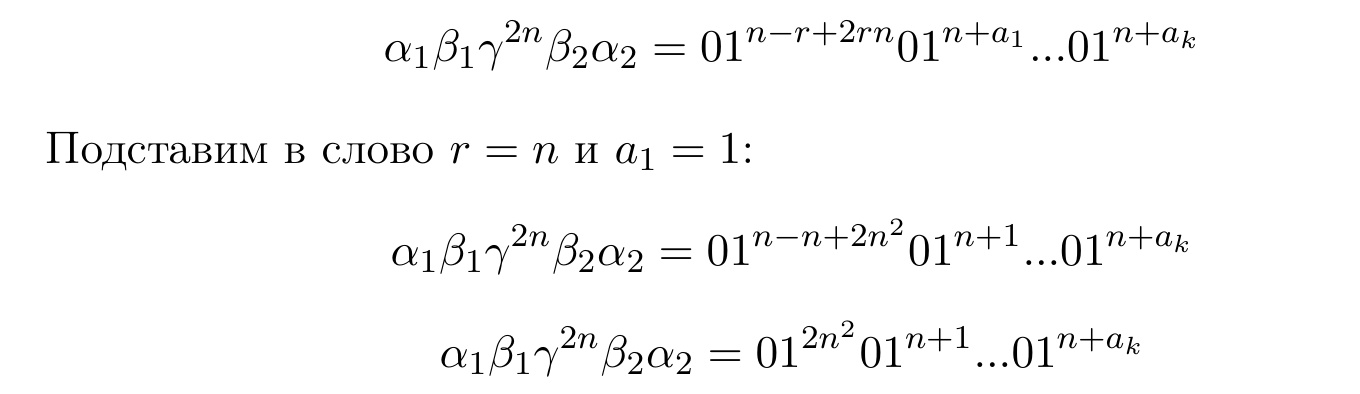

In [4]:
from pathlib import Path
from IPython.display import display
import IPython.display
for img in list(Path("test_output1").glob("*/*.jpg")):
    print(f"Processing image: {img}")
    display(IPython.display.Image(img))